# BEST NEIGHBORHOOD

## Introduction

<font size="4">To find the best neighborhood, we used datasets provided by WPRDC. The sub-metrics being used are </font>
* <font size = "4">Cleanliness
* <font size = "4">Arrest Counts
* <font size = "4">Average Air Pollution
  <br>
<font size ="4">
These three sub-metrics impact the quality of life and community well-being of the neighborhood. Cleanliness serves as an indicator of how well-maintained and cared-for a neighborhood is. It shows the community pride and services, which can influence property values. Arrest counts provide a look into public safety and crime levels in the neighborhoods. Neighborhoods with fewer arrests typically offer residents a greater sense of safety and a better environment for families and individuals. Average air pollution measures environmental health, which could affect an individual's health. Together, these sub-metrics allow us to see a neighborhood's livability by seeing its health and safety.
</font>

<font size="4">Overall Metric is Health and Safety</font>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import fpsnippets

## Cleanliness
<font size="4">One aspect that is required of a good neighborhood is cleanliness. A neighborhood that isn't clean shows a lack of care and respect for the neighborhood. It also gives a bad reputation to not just the offenders, but all the people in the neighborhood. When people dont clean up for themselves, it comes at a cost - the cost of someone's money, time, or both. </font>


### Data Description
<font size ="4">I chose a dataset listing the number of offenses from 2017-2022 that called for some kind of cleaning action per neighborhood in Pittsburgh. I then decided that the best neighborhood should be based on the lowest offenses.</font>


In [12]:
pd.set_option('display.max_rows', None)
clean = pd.read_csv('CleanlinessDataset.csv')
neighborhood_counts = clean['NEIGHBORHOOD'].value_counts()
# Showing tasks greater than 1500, as neighborhoods below this count have low populations
filtered_counts = neighborhood_counts[neighborhood_counts > 1500]
print(filtered_counts)

NEIGHBORHOOD
Brookline                    27745
Carrick                      26202
Squirrel Hill South          22679
South Side Slopes            22312
South Side Flats             21128
Bloomfield                   18268
Mount Washington             17502
Beechview                    15792
Central Business District    14365
Greenfield                   14066
Shadyside                    13736
Hazelwood                    12288
Central Lawrenceville        12233
East Liberty                 11681
Brighton Heights             11358
Sheraden                     10992
Squirrel Hill North          10956
Marshall-Shadeland           10584
Lincoln-Lemington-Belmar     10414
Garfield                     10234
Highland Park                 9811
Knoxville                     9595
Stanton Heights               9494
Perry North                   9460
Overbrook                     9372
Perry South                   9094
Homewood North                8850
Central Oakland               8833
Point B

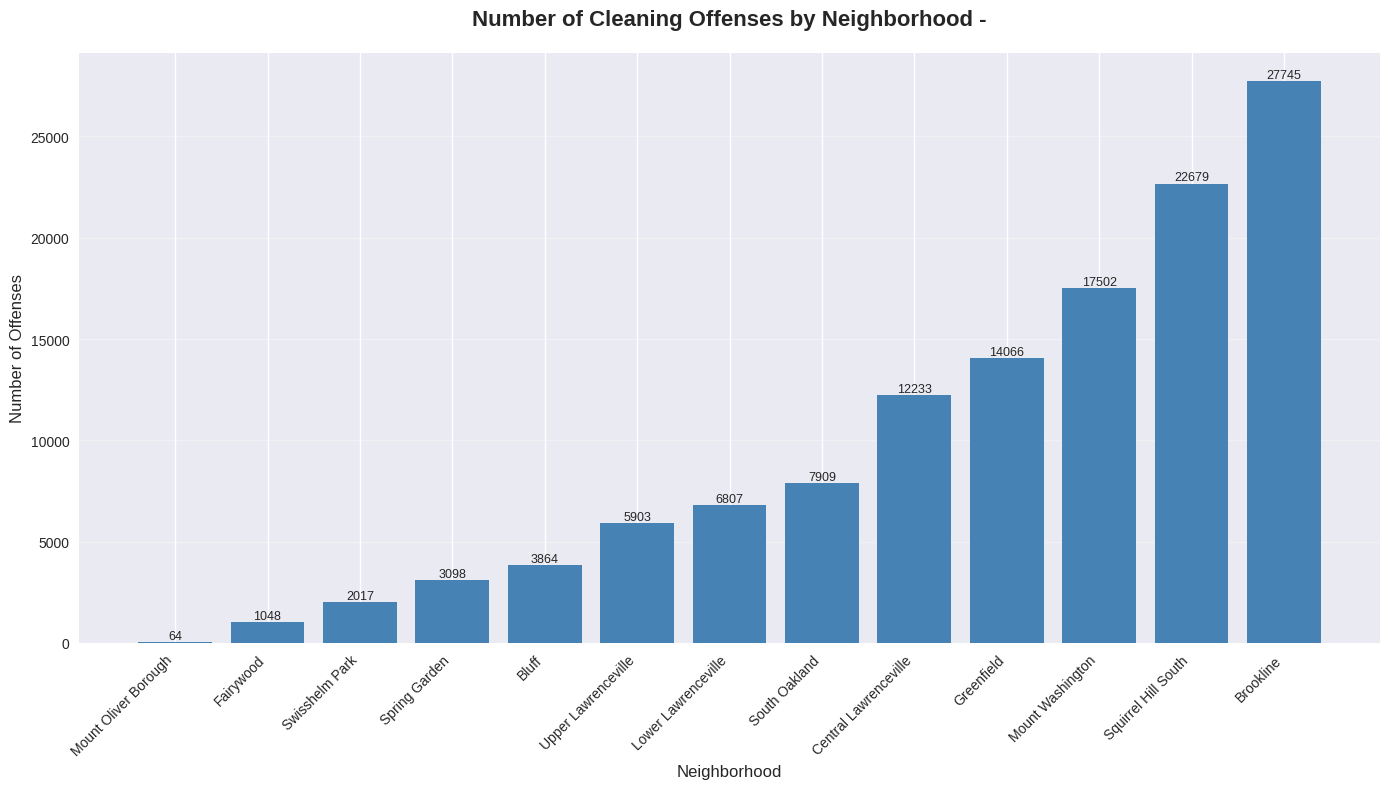

In [16]:
plt.style.use('seaborn-v0_8')

data = {
    'Neighborhood': [
        'Mount Oliver Borough', 'Fairywood', 'Swisshelm Park', 'Spring Garden', 'Bluff', 'Upper Lawrenceville','Lower Lawrenceville', 'South Oakland', 'Central Lawrenceville',
        'Greenfield', 'Mount Washington', 'Squirrel Hill South', 'Brookline'
    ],
    'Count': [64, 1048, 2017, 3098, 3864, 5903, 6807, 7909, 12233, 14066, 17502, 22679, 27745]
}


df = pd.DataFrame(data)

df_sorted = df.sort_values('Count', ascending=True)

plt.figure(figsize=(14, 8))

bars = plt.bar(df_sorted['Neighborhood'], df_sorted['Count'], 
               color='steelblue') 

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontsize=9)

plt.title('Number of Cleaning Offenses by Neighborhood -', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Number of Offenses', fontsize=12)

plt.xticks(rotation=45, ha='right')


plt.grid(axis='y', alpha=0.3)

plt.tight_layout()


plt.show()

### The Conclusion
<font size="4">As we can see from the data, the bottom neighborhoods at the bottom of this list are the neighborhoods with clean streets and sidewalks. We have New Homestead at our lowest with 1594 requested cleaning tasks.</font>


## Arrest Counts
<font size="4">This is an important metric as this regards the safety of the residents. The information on the arrest counts from each neighborhood will allow us to determine the crime rate. Having a lower arrest count will show a lower crime rate; a higher arrest count will show more crime.</font>
### Data
<font size="4">The dataset being used is Pittsburgh Police Arrests (2024-2025). This dataset provides broad information on arrests, allowing us to add them up for our metric.</font>

In [6]:
df = pd.read_excel('arrests_2024_to_sept_2025.xlsx')
result_df = df['Neighborhood'].value_counts().reset_index()
result_df.columns = ['Neighborhood', 'Count']
print(result_df.tail(20))
#output_filename = 'arrests_summary.xlsx'
#result_df.to_excel(output_filename, index=False)

           Neighborhood  Count
71           Upper Hill     58
72       Allegheny West     54
73                 Hays     53
74          Polish Hill     53
75            Fairywood     52
76           Friendship     52
77  Upper Lawrenceville     49
78           Glen Hazel     44
79          Summer Hill     38
80          Morningside     36
81               Esplen     35
82         Mount Oliver     35
83              Oakwood     31
84        East Carnegie     29
85        New Homestead     28
86        Regent Square     23
87       Swisshelm Park     17
88            Ridgemont     16
89          Saint Clair     15
90            Chartiers     14


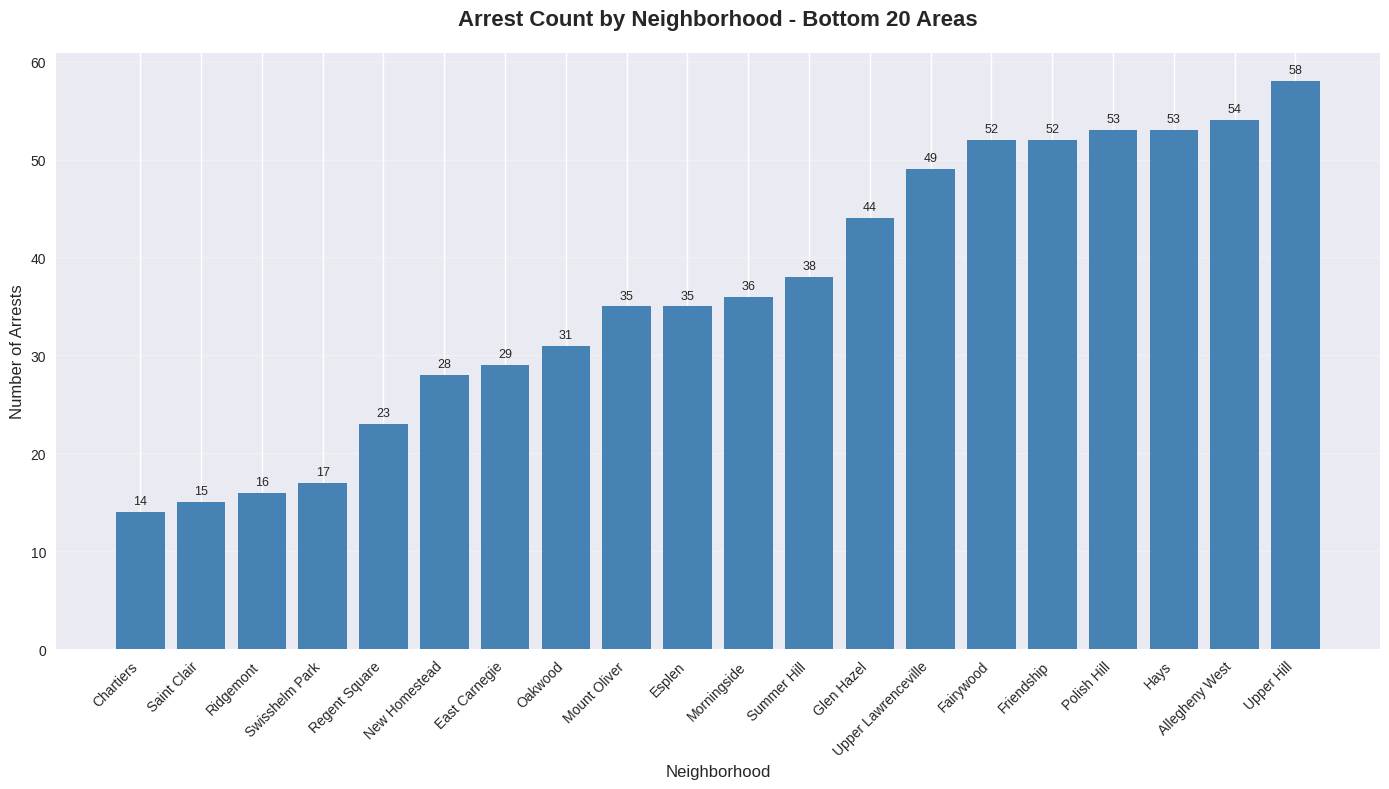

In [9]:
plt.style.use('seaborn-v0_8')

data = {
    'Neighborhood': [
        'Chartiers', 'Saint Clair', 'Ridgemont', 'Swisshelm Park', 'Regent Square',
        'New Homestead', 'East Carnegie', 'Oakwood', 'Mount Oliver', 'Esplen',
        'Morningside', 'Summer Hill', 'Glen Hazel', 'Upper Lawrenceville',
        'Fairywood', 'Friendship', 'Polish Hill', 'Hays', 'Allegheny West',
        'Upper Hill'
    ],
    'Count': [14, 15, 16, 17, 23, 28, 29, 31, 35, 35, 36, 38, 44, 49, 52, 52, 53, 53, 54, 58]
}


df = pd.DataFrame(data)

df_sorted = df.sort_values('Count', ascending=True)

plt.figure(figsize=(14, 8))

bars = plt.bar(df_sorted['Neighborhood'], df_sorted['Count'], 
               color='steelblue')  # 使用单一颜色

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontsize=9)

plt.title('Arrest Count by Neighborhood - Bottom 20 Areas', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Number of Arrests', fontsize=12)

plt.xticks(rotation=45, ha='right')


plt.grid(axis='y', alpha=0.3)

plt.tight_layout()


plt.show()


### Conclusion
<font size="4">This is the 15 lowest arrest count neighborhood. All these neighborhoods have similar arrest counts, which allows us to choose from many of these neighborhoods.</font>
<br>

## Average Air Pollution

<font size="4">To determine the best neighborhood in Pittsburgh, we analyzed average air pollution levels across different neighborhoods using data from the Allegheny County Air Quality Emissions dataset. This is a metric since it can impact a resident's health.</font>

### Steps

<font size="4">We calculated the average air pollution for each neighborhood by:</font>
1. <font size ="4">Grouping emissions by their geographic coordinates
2. <font size ="4">Sorting those geographic coordinates into their respective neighborhood
3. <font size ="4">Finding the average tons of pollutants per year for each neighborhood
4. <font size ="4">Identifying the lowest neighborhoods

### Results

In [7]:
df = pd.read_csv('AQEData.csv')

location_pollution = df.groupby(['lat', 'lon'])['tons_per_yr'].sum().reset_index()

# Use fp snippets to change coordinates to neighborhoods
location_pollution['neighborhood'] = location_pollution.apply(
    lambda row: fpsnippets.geo_to_neighborhood(row['lat'], row['lon']),
    axis=1
)

# group the neighborhood we got and the tons per year together
neighborhood_avg_pollution = location_pollution.groupby('neighborhood')['tons_per_yr'].mean().reset_index()

df['neighborhood'] = df.apply(
    lambda row: fpsnippets.geo_to_neighborhood(row['lat'], row['lon']),
    axis=1
)

#count the number of reports for each neighborhood
report_counts = df.groupby('neighborhood').size().reset_index(name='num_reports')

# merge the data together
neighborhood_stats = neighborhood_avg_pollution.merge(report_counts, on='neighborhood')
neighborhood_stats.columns = ['neighborhood', 'avg_tons_per_yr', 'num_reports']

# Filter for neighborhoods with at least 50 reports. This is due to a bunch of neighborhoods having around 10 reports, making their avg very low.
neighborhood_stats_filtered = neighborhood_stats[neighborhood_stats['num_reports'] >= 50]

# Sort data to be printed
neighborhood_stats_sorted = neighborhood_stats_filtered.sort_values(by='avg_tons_per_yr', ascending=True)

# print out
print("Neighborhoods with the lowest average air pollution:")
print(neighborhood_stats_sorted.head(20))

Neighborhoods with the lowest average air pollution:
                 neighborhood  avg_tons_per_yr  num_reports
20         Point Breeze North       118.430000          130
27        Upper Lawrenceville       188.677800          171
15                    Larimer       534.410000          160
23           South Side Flats      1294.155000           66
17        Lower Lawrenceville      1451.656545          162
16   Lincoln-Lemington-Belmar      7444.010000           99
3                   Brookline      9437.223400          233
2                       Bluff     12648.700400          397
1                  Bloomfield     15923.230000           66
6   Central Business District     57403.033343          336
25            Terrace Village     65515.640250          156
18         Marshall-Shadeland     97911.136031          777
22              South Oakland    104945.493224          558
13                       Hays    112675.487796          225
7       Central Lawrenceville    122682.841962 

<font size="4">To make it easier to view, lets look at the top 5 placements on a bar graph.</font>

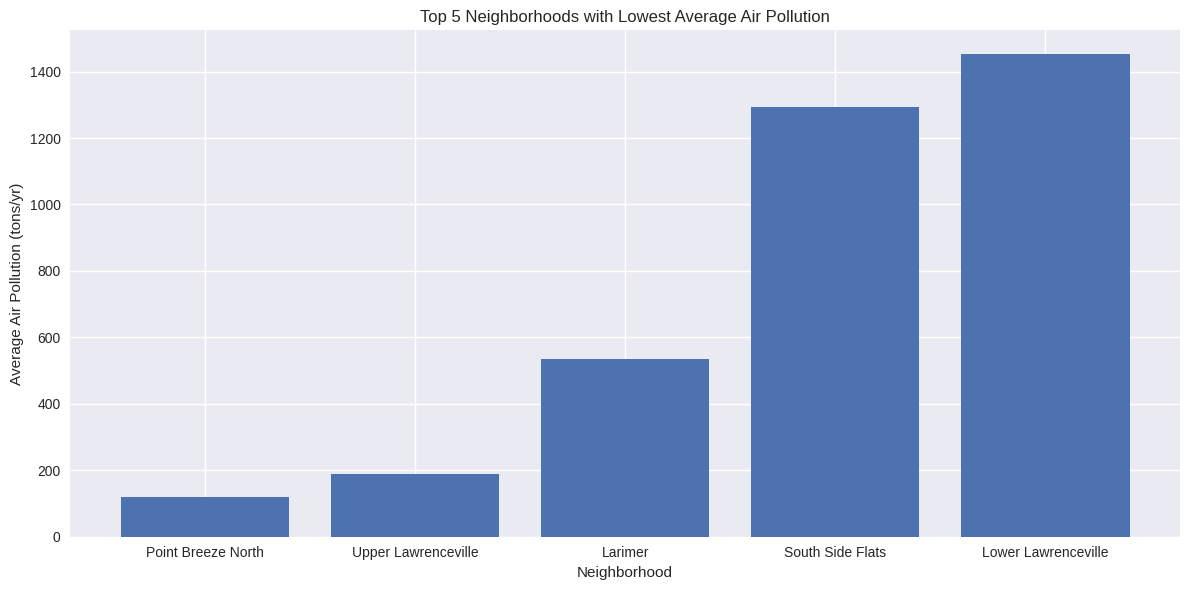

In [18]:
top_5_lowest = neighborhood_stats_sorted.head(5)
plt.figure(figsize=(12, 6))
plt.bar(
    top_5_lowest['neighborhood'],
    top_5_lowest['avg_tons_per_yr']
)
plt.xlabel('Neighborhood')
plt.ylabel('Average Air Pollution (tons/yr)')
plt.title('Top 5 Neighborhoods with Lowest Average Air Pollution')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<font size = "4">What we can see is that our lowest average is Point Breeze North at 118.43 tons per year with 130 reports. </font>

## THE BEST NEIGHBORHOOD

<font size="4">The best neighborhood between all three metrics has been different, but within our metrics, there is one neighborhood with a great enough population that stands out as best between the three. That neighborhood is **Lawrenceville.** Lawrenceville is ranked in the top 30 for cleanliness tasks, the top 14 for lowest arrest count, and the top 2 for lowest average air pollution. This is a better result than any other neighborhood in our three metrics, considering population. To get a better look at that, there is a bar graph below with the top placements in each sub-metric compared to Lawrenceville</font>

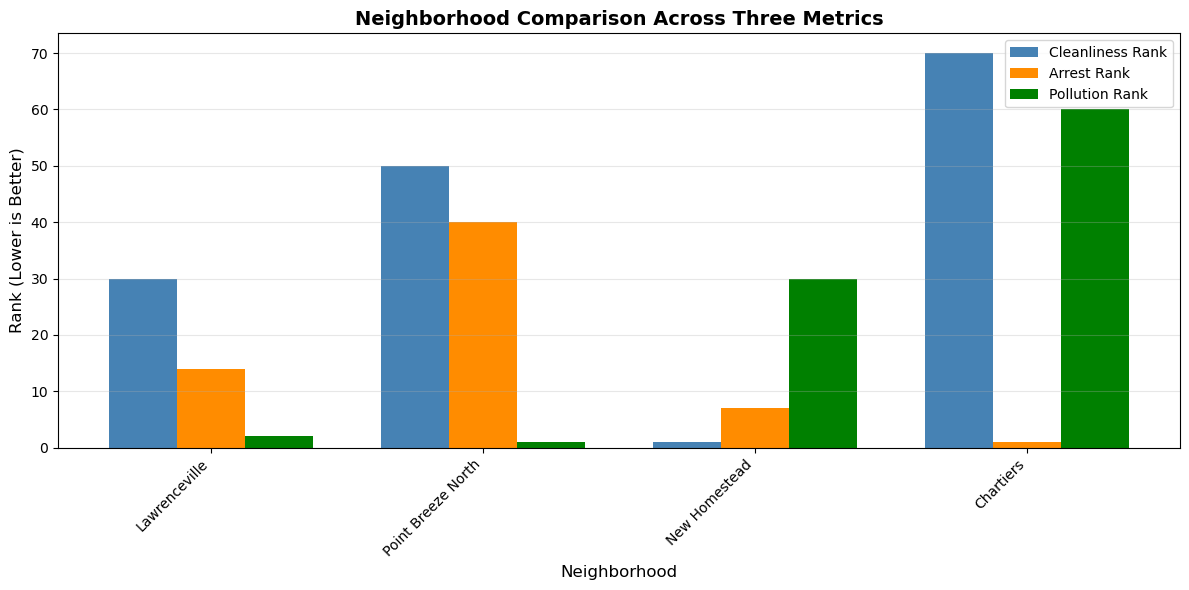

In [14]:
neighborhoods_comparison = pd.DataFrame({
    'Neighborhood': ['Lawrenceville', 'Point Breeze North', 'New Homestead', 'Chartiers'],
    'Cleanliness_Rank': [30, 50, 1, 70],  # Lower is better
    'Arrest_Rank': [14, 40, 7, 1],
    'Pollution_Rank': [2, 1, 30, 60]
})

# Set up the data
neighborhoods = neighborhoods_comparison['Neighborhood']
cleanliness = neighborhoods_comparison['Cleanliness_Rank']
arrests = neighborhoods_comparison['Arrest_Rank']
pollution = neighborhoods_comparison['Pollution_Rank']

# Create positions for the bars
x = np.arange(len(neighborhoods))
width = 0.25

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Create bars for each metric
bars1 = ax.bar(x - width, cleanliness, width, label='Cleanliness Rank', color='steelblue')
bars2 = ax.bar(x, arrests, width, label='Arrest Rank', color='darkorange')
bars3 = ax.bar(x + width, pollution, width, label='Pollution Rank', color='green')

# Add labels and title
ax.set_xlabel('Neighborhood', fontsize=12)
ax.set_ylabel('Rank (Lower is Better)', fontsize=12)
ax.set_title('Neighborhood Comparison Across Three Metrics', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(neighborhoods, rotation=45, ha='right')
ax.legend()

# Add grid
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

<br>
<br>




## Conclusion of Data Determined Neighborhood

<font size="4">Mason Kaing: I am not from Pittsburgh, so my favorite neighborhood, as of the few months I have been here, would be Squirrel Hill. I wouldn't know how different it is in person, as I have no experience going to Lawrenceville, but with the data and for this metric, it seems that Squirrel Hill is worse than Lawrenceville. Three datasets for a metric of a neighborhood are too vague to determine the best, rather than actually going to the neighborhood and experiencing it.</font>